# Core concepts of Tsetlin Machine

ml algorithm
propotional logic
Tsetlin automata
mechanism of logic based rules -> interpretable


## Components of a Tsetlin Machine

### Tsetlin Automata (TA)

#### Role

* Basic learning units

* Each **automaton** independently decide whether to include a spesific input **feature** (and possibly its **negation**) in a **clause** that it is constructing

TODO: What is feature and its negation?

#### Mechanism

* Operate based on **feedback mechanism** where **actions** (include/exclude feature) are **rewarded or penalized** based on their **contribution** to **correct classifications** 

TODO: What does that mean?

### Clauses

#### Formation

* **Clauses** are formed through the **conjunction** (AND operation) of **literals** (input features or their negations) chosen by the **Tsetlin Automata**.

#### Purpose

* Each clause can be seen as a rule that contributes to the final decision of the machine. 

* In binary classification, clauses vote on the class labels.

### Voting

#### Process

* After constructing the clauses, the Tsetlin Machine aggregates votes from each clause to make a final prediction. 

* Clauses that are satisfied by the input vote for or against certain classifications.

In [1]:
import numpy as np

class SimpleTsetlinAutomaton:
    def __init__(self):
        # States represent whether to include the feature (1) or not (0)
        self.state = 0  # Start with not including the feature

    def update(self, reward):
        # Simple reward/penalty system: if rewarded, include the feature, otherwise don't
        if reward:
            self.state = 1
        else:
            self.state = 0

    def decide(self):
        # Decision based on state
        return self.state

# Example usage
automaton = SimpleTsetlinAutomaton()
data = [0, 1, 0, 1, 0, 1]  # Example feature values
labels = [0, 1, 0, 1, 0, 1]  # Corresponding labels (perfect correlation)

for feature, label in zip(data, labels):
    decision = automaton.decide()
    # Reward if decision matches the label
    reward = (decision == label)
    automaton.update(reward)

print(f"Automaton's decision to include feature: {automaton.decide()}")


Automaton's decision to include feature: 1


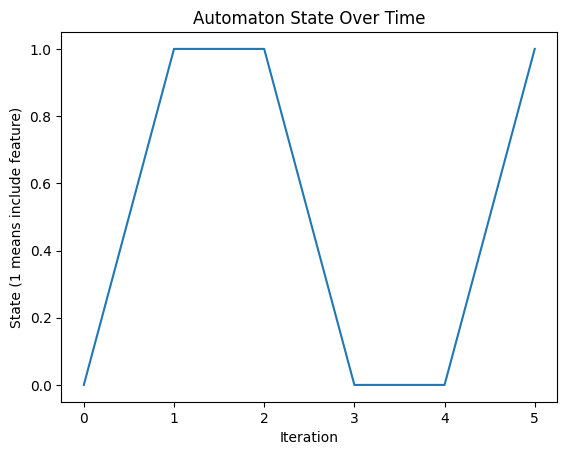

In [2]:
import matplotlib.pyplot as plt

# Assume we have recorded states in a list `states` during the loop
states = []
automaton = SimpleTsetlinAutomaton()
for feature, label in zip(data, labels):
    states.append(automaton.decide())
    reward = (automaton.decide() == label)
    automaton.update(reward)

plt.plot(states)
plt.xlabel('Iteration')
plt.ylabel('State (1 means include feature)')
plt.title('Automaton State Over Time')
plt.show()


In [6]:
# Initial Setup
features = ["red", "heavy", "large"]  # R, H, L
states = [1, 1, 1]  # Initial states for TA1, TA2, TA3 (neutral)

# Function to determine the vote based on state
def vote(state):
    return True if state == 2 else False

# Function to update state based on feedback
def update_state(state, reward):
    if reward:
        if state < 2:
            return state + 1  # Move toward inclusion
    else:
        if state > 0:
            return state - 1  # Move toward exclusion
    return state

# Iteration 1
f = [True, False, True]  # Object is Red, Not Heavy, and Large (R, NH, L)
votes = [vote(states[0]), vote(states[1]), vote(states[2])]
final_decision = all(votes)  # Combine votes (simple AND logic for this example)
correct_decision = False  # The correct decision is NOT to pick up the object
reward = final_decision == correct_decision  # Determine if the overall decision is correct
states[0] = update_state(states[0], reward)
states[1] = update_state(states[1], reward)
states[2] = update_state(states[2], reward)
print(f"Iteration 1: States = {states}, Votes = {votes}, Final Decision = {final_decision}, Reward = {reward}")

# Iteration 2
f = [False, True, False]  # Object is Not Red, Heavy, and Not Large (NR, H, NL)
votes = [vote(states[0]), vote(states[1]), vote(states[2])]
final_decision = all(votes)
correct_decision = True  # The correct decision is to pick up the object
reward = final_decision == correct_decision
states[0] = update_state(states[0], reward)
states[1] = update_state(states[1], reward)
states[2] = update_state(states[2], reward)
print(f"Iteration 2: States = {states}, Votes = {votes}, Final Decision = {final_decision}, Reward = {reward}")

# Iteration 3
f = [True, True, True]  # Object is Red, Heavy, and Large (R, H, L)
votes = [vote(states[0]), vote(states[1]), vote(states[2])]
final_decision = all(votes)
correct_decision = True  # The correct decision is to pick up the object
reward = final_decision == correct_decision
states[0] = update_state(states[0], reward)
states[1] = update_state(states[1], reward)
states[2] = update_state(states[2], reward)
print(f"Iteration 3: States = {states}, Votes = {votes}, Final Decision = {final_decision}, Reward = {reward}")

# Iteration 4
f = [True, False, True]  # Object is Red, Not Heavy, and Large (R, NH, L)
votes = [vote(states[0]), vote(states[1]), vote(states[2])]
final_decision = all(votes)
correct_decision = False  # The correct decision is NOT to pick up the object
reward = final_decision == correct_decision
states[0] = update_state(states[0], reward)
states[1] = update_state(states[1], reward)
states[2] = update_state(states[2], reward)
print(f"Iteration 4: States = {states}, Votes = {votes}, Final Decision = {final_decision}, Reward = {reward}")


Iteration 1: States = [2, 2, 2], Votes = [False, False, False], Final Decision = False, Reward = True
Iteration 2: States = [2, 2, 2], Votes = [True, True, True], Final Decision = True, Reward = True
Iteration 3: States = [2, 2, 2], Votes = [True, True, True], Final Decision = True, Reward = True
Iteration 4: States = [1, 1, 1], Votes = [True, True, True], Final Decision = True, Reward = False


In [8]:
import numpy as np

# Initial Setup
N = 10  # Number of voters (cubicles)
votes = np.random.choice([True, False], N)  # Initial random votes (True = "Yes", False = "No")
lambda_star = 5  # Optimal number of "Yes" votes
rounds = 10  # Number of voting rounds
learning_rate = 0.5  # Probability of changing vote based on feedback

# Define the performance criterion G(λ)
def G(lambda_value):
    # Simple unimodal function, e.g., peaks at lambda_star
    return np.exp(-((lambda_value - lambda_star) ** 2) / 2.0)

# Function to update vote based on gain or loss
def update_vote(vote, gain, learning_rate):
    if gain:
        return True if np.random.rand() < learning_rate else vote
    else:
        return False if np.random.rand() < learning_rate else vote

# Voting rounds
for round_num in range(1, rounds + 1):
    # Step 3: Referee counts the number of "Yes" votes (λ)
    lambda_value = np.sum(votes)
    
    # Step 4: Calculate the performance criterion G(λ)
    performance = G(lambda_value)
    
    # Step 6: Award or charge each voter based on G(λ)
    gains = np.random.rand(N) < performance  # True = gain (reward), False = loss (penalty)
    
    # Step 8: Update votes based on individual gains/losses
    votes = [update_vote(vote, gain, learning_rate) for vote, gain in zip(votes, gains)]
    
    # Output the results of the round
    print(f"Round {round_num}: λ = {lambda_value}, G(λ) = {performance:.2f}, Votes = {votes}")

# Final result
final_lambda = np.sum(votes)
print(f"\nFinal result after {rounds} rounds: λ = {final_lambda}, Votes = {votes}")


Round 1: λ = 4, G(λ) = 0.61, Votes = [True, np.False_, np.False_, np.False_, np.False_, True, True, True, np.False_, np.True_]
Round 2: λ = 5, G(λ) = 1.00, Votes = [True, True, True, True, np.False_, True, True, True, np.False_, np.True_]
Round 3: λ = 8, G(λ) = 0.01, Votes = [False, False, False, False, np.False_, False, False, False, np.False_, False]
Round 4: λ = 0, G(λ) = 0.00, Votes = [False, False, False, False, np.False_, False, False, False, np.False_, False]
Round 5: λ = 0, G(λ) = 0.00, Votes = [False, False, False, False, np.False_, False, False, False, np.False_, False]
Round 6: λ = 0, G(λ) = 0.00, Votes = [False, False, False, False, False, False, False, False, np.False_, False]
Round 7: λ = 0, G(λ) = 0.00, Votes = [False, False, False, False, False, False, False, False, False, False]
Round 8: λ = 0, G(λ) = 0.00, Votes = [False, False, False, False, False, False, False, False, False, False]
Round 9: λ = 0, G(λ) = 0.00, Votes = [False, False, False, False, False, False, False

In [10]:
import random

class TsetlinAutomaton:
    def __init__(self, n):
        # n is the number of states per action
        self.n = n
        # Initial state selected randomly
        self.state = random.choice([self.n, self.n+1])

    def reward(self):
        if self.state <= self.n and self.state > 1:
            self.state -= 1
        elif self.state > self.n and self.state < 2*self.n:
            self.state += 1

    def penalize(self):
        if self.state <= self.n:
            self.state += 1
        elif self.state > self.n:
            self.state -= 1

    def make_decision(self):
        if self.state <= self.n:
            return False
        else:
            return True


def evaluate_voting_pattern(votes):
    # Check if exactly 2 out of 3 automata voted True
    if sum(votes) == 2:
        return True
    else:
        return False


# Initialize 3 Tsetlin automata
n_states = 3
automata = [TsetlinAutomaton(n_states) for _ in range(3)]

# Simulation parameters
rounds = 1000
success_count = 0

for i in range(rounds):
    # Each automaton makes a decision (True or False)
    votes = [automaton.make_decision() for automaton in automata]

    # Evaluate the pattern: 2 out of 3 should be True
    correct_pattern = evaluate_voting_pattern(votes)

    if correct_pattern:
        success_count += 1
        # Reward all automata
        for automaton in automata:
            automaton.reward()
    else:
        # Penalize all automata
        for automaton in automata:
            automaton.penalize()

    print(f"Round {i+1}: Votes = {votes}, Success = {correct_pattern}")

print(f"\nTotal successful rounds where 2 out of 3 voted True: {success_count} out of {rounds}")


Round 1: Votes = [True, True, True], Success = False
Round 2: Votes = [False, False, False], Success = False
Round 3: Votes = [True, True, True], Success = False
Round 4: Votes = [False, False, False], Success = False
Round 5: Votes = [True, True, True], Success = False
Round 6: Votes = [False, False, False], Success = False
Round 7: Votes = [True, True, True], Success = False
Round 8: Votes = [False, False, False], Success = False
Round 9: Votes = [True, True, True], Success = False
Round 10: Votes = [False, False, False], Success = False
Round 11: Votes = [True, True, True], Success = False
Round 12: Votes = [False, False, False], Success = False
Round 13: Votes = [True, True, True], Success = False
Round 14: Votes = [False, False, False], Success = False
Round 15: Votes = [True, True, True], Success = False
Round 16: Votes = [False, False, False], Success = False
Round 17: Votes = [True, True, True], Success = False
Round 18: Votes = [False, False, False], Success = False
Round 19: 

In [14]:
import random

class TsetlinAutomaton:
    def __init__(self, n):
        self.n = n
        self.state = random.choice([self.n, self.n + 1])

    def reward(self):
        if self.state > 1 and self.state <= self.n:
            self.state -= 1  # Move toward "True"
        elif self.state > self.n and self.state < 2 * self.n:
            self.state += 1  # Move toward "False"

    def penalize(self):
        if self.state < self.n:
            self.state += 1  # Move toward "False"
        elif self.state > self.n:
            self.state -= 1  # Move toward "True"

    def make_decision(self):
        return self.state <= self.n

# Environment function to evaluate if 2/3 automata vote True
def evaluate_2_of_3(votes):
    true_count = sum(votes)
    print(f"Votes: {votes}, True Count: {true_count}")
    return true_count == 2

# Initialize 3 Tsetlin Automata
automata = [TsetlinAutomaton(3) for _ in range(3)]

# Simulation parameters
rounds = 50  # Number of voting rounds

# Main loop to run the simulation
for round_num in range(1, rounds + 1):
    # Step 1: Each automaton makes a decision (True or False)
    votes = [automaton.make_decision() for automaton in automata]
    print(f"Votes: {votes}")
    
    # Step 2: Evaluate if exactly 2 out of 3 votes are True
    correct_pattern = evaluate_2_of_3(votes)
    
    # Step 3: Reward or penalize automata based on the result
    for automaton in automata:
        if correct_pattern:
            automaton.reward()
        else:
            automaton.penalize()

    # Output the results of the round
    print(f"Round {round_num}: Votes = {votes}, Correct Pattern = {correct_pattern}")

# Final summary
final_votes = [automaton.make_decision() for automaton in automata]
print(f"\nFinal Votes: {final_votes}")


Votes: [False, False, True]
Votes: [False, False, True], True Count: 1
Round 1: Votes = [False, False, True], Correct Pattern = False
Votes: [True, True, True]
Votes: [True, True, True], True Count: 3
Round 2: Votes = [True, True, True], Correct Pattern = False
Votes: [True, True, True]
Votes: [True, True, True], True Count: 3
Round 3: Votes = [True, True, True], Correct Pattern = False
Votes: [True, True, True]
Votes: [True, True, True], True Count: 3
Round 4: Votes = [True, True, True], Correct Pattern = False
Votes: [True, True, True]
Votes: [True, True, True], True Count: 3
Round 5: Votes = [True, True, True], Correct Pattern = False
Votes: [True, True, True]
Votes: [True, True, True], True Count: 3
Round 6: Votes = [True, True, True], Correct Pattern = False
Votes: [True, True, True]
Votes: [True, True, True], True Count: 3
Round 7: Votes = [True, True, True], Correct Pattern = False
Votes: [True, True, True]
Votes: [True, True, True], True Count: 3
Round 8: Votes = [True, True, T